In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Time series\\Quaintpy Weather Derivatives\\2 Statistical Analysis of Temperature Data\\Max_temp.csv')
df1=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Time series\\Quaintpy Weather Derivatives\\2 Statistical Analysis of Temperature Data\\Min_temp.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59718 entries, 0 to 59717
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    59718 non-null  object 
 1   Tmax    59565 non-null  float64
dtypes: float64(1), object(1)
memory usage: 933.2+ KB


In [3]:
df = df.set_index(pd.DatetimeIndex(df['Date']))
df = df.drop(['Date'], axis=1)
df

,Tmax
Date,
1859-01-01,24.4
1859-01-02,24.4
1859-01-03,24.2
1859-01-04,24.7
1859-01-05,24.6
...,...
2022-06-29,17.9
2022-06-30,16.9
2022-07-01,12.0


In [4]:
df['year'] = df.index.year

In [5]:
year=0
day=[]
m=0
for x in df['year']:
    if x>year:
        day.append(1)
        m=1
        year=x
    else:
        m=m+1
        day.append(m)

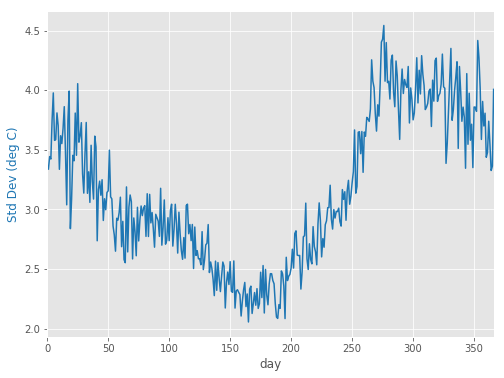

In [6]:
df['Month'] = df.index.month
df['day'] = day
vol_days=df.groupby(['day'])['Tmax'].agg(['mean','std'])
vol_days['std'].plot(color='tab:blue',figsize=(8,6))
plt.ylabel('Std Dev (deg C)',color='tab:blue')
plt.xlim(0,366)
plt.show()

In [7]:
df

,Tmax,year,Month,day
Date,,,,
1859-01-01,24.4,1859,1,1
1859-01-02,24.4,1859,1,2
1859-01-03,24.2,1859,1,3
1859-01-04,24.7,1859,1,4
1859-01-05,24.6,1859,1,5
...,...,...,...,...
2022-06-29,17.9,2022,6,180
2022-06-30,16.9,2022,6,181
2022-07-01,12.0,2022,7,182


In [8]:
vol_months=df.groupby(['Month'])['Tmax'].agg(['mean','std'])
vol_days['days']=vol_days.index
def change_month(row):
    print(row)
    date = dt.datetime(1859, 1, 1) + dt.timedelta(row.days - 1)
    print(date)# end date of the month index.month has 30 days but we start from 1 ,so get rid of default 1 
    return vol_months.loc[date.month,'std']#we are finding monthly std data from vol_months 
vol_days['vol_months'] = vol_days.apply(change_month, axis=1)#we are substitutuing dayss value with monthly std data from change_month

mean    25.879755
std      3.338628
days     1.000000
Name: 1, dtype: float64
1859-01-01 00:00:00
mean    25.901829
std      3.443469
days     2.000000
Name: 2, dtype: float64
1859-01-02 00:00:00
mean    25.850000
std      3.423099
days     3.000000
Name: 3, dtype: float64
1859-01-03 00:00:00
mean    26.079878
std      3.747657
days     4.000000
Name: 4, dtype: float64
1859-01-04 00:00:00
mean    26.021472
std      3.977743
days     5.000000
Name: 5, dtype: float64
1859-01-05 00:00:00
mean    25.912195
std      3.579334
days     6.000000
Name: 6, dtype: float64
1859-01-06 00:00:00
mean    25.874233
std      3.585785
days     7.000000
Name: 7, dtype: float64
1859-01-07 00:00:00
mean    25.855215
std      3.810012
days     8.000000
Name: 8, dtype: float64
1859-01-08 00:00:00
mean    25.955488
std      3.703924
days     9.000000
Name: 9, dtype: float64
1859-01-09 00:00:00
mean    26.058537
std      3.336706
days    10.000000
Name: 10, dtype: float64
1859-01-10 00:00:00
mean    26.195732
s

mean     22.277160
std       4.000687
days    290.000000
Name: 290, dtype: float64
1859-10-17 00:00:00
mean     22.422840
std       4.178015
days    291.000000
Name: 291, dtype: float64
1859-10-18 00:00:00
mean     21.932298
std       3.973028
days    292.000000
Name: 292, dtype: float64
1859-10-19 00:00:00
mean     22.391411
std       4.090389
days    293.000000
Name: 293, dtype: float64
1859-10-20 00:00:00
mean     22.216049
std       4.045961
days    294.000000
Name: 294, dtype: float64
1859-10-21 00:00:00
mean     22.298773
std       4.024017
days    295.000000
Name: 295, dtype: float64
1859-10-22 00:00:00
mean     22.359259
std       4.199461
days    296.000000
Name: 296, dtype: float64
1859-10-23 00:00:00
mean     22.437888
std       3.725620
days    297.000000
Name: 297, dtype: float64
1859-10-24 00:00:00
mean     22.193210
std       4.019396
days    298.000000
Name: 298, dtype: float64
1859-10-25 00:00:00
mean     22.569136
std       3.927357
days    299.000000
Name: 299, dtype

In [9]:
vol_days#[:-1]

,mean,std,days,vol_months
day,,,,
1,25.879755,3.338628,1,3.551507
2,25.901829,3.443469,2,3.551507
3,25.850000,3.423099,3,3.551507
4,26.079878,3.747657,4,3.551507
5,26.021472,3.977743,5,3.551507
...,...,...,...,...
362,25.568098,3.740184,362,3.798183
363,25.562963,3.545006,363,3.798183
364,25.489571,3.326857,364,3.798183


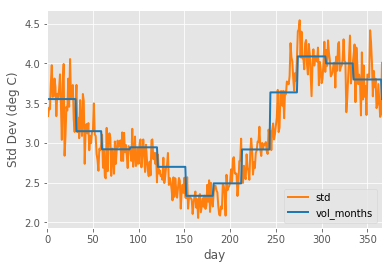

In [10]:
vol_days[['std','vol_months']].plot(color=['tab:orange','tab:blue'],linewidth=2)
plt.ylabel('Std Dev (deg C)')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

In [11]:
#Parametric Regression
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
# Preprocess x, y combinations to handle dimensionality of Polynomial Features
x = np.array(vol_days['std'].index)
y = np.array(vol_days['std'].values)
x,y

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [12]:
#create single dimesion ,Because polynomial cant work without flatten array
x=x[:,np.newaxis]
y=y[:,np.newaxis]
x,y

(array([[  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27],
        [ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55],
        [ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
        [ 66],
        [ 

In [13]:
# initialise degrees of freedom
poly_feats3 = PolynomialFeatures(degree=3)
poly_feats4 = PolynomialFeatures(degree=4)
poly_feats5 = PolynomialFeatures(degree=5)
poly_feats6 = PolynomialFeatures(degree=6)
poly_feats7 = PolynomialFeatures(degree=7)

In [14]:
# Fit transform to number of polynomial features
xp3 = poly_feats3.fit_transform(x)
xp4 = poly_feats4.fit_transform(x)
xp5 = poly_feats5.fit_transform(x)
xp6 = poly_feats6.fit_transform(x)
xp7 = poly_feats7.fit_transform(x)

In [15]:
# Fit using ordinary least squares
p3 = sm.OLS(y, xp3).fit()
p4 = sm.OLS(y, xp4).fit()
p5 = sm.OLS(y, xp5).fit()
p6 = sm.OLS(y, xp6).fit()
p7 = sm.OLS(y, xp7).fit()

In [16]:
# Predict using original data and model fit
poly3 = p3.predict(xp3)#we have to put ploy values into linear regression to get curvey line
poly4 = p4.predict(xp4)
poly5 = p5.predict(xp5)
poly6 = p6.predict(xp6)
poly7 = p7.predict(xp7)

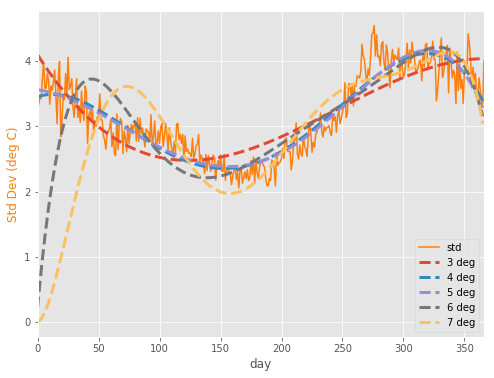

In [17]:
vol = df.groupby(['day'])['Tmax'].agg(['mean','std'])
vol['std'].plot(color='tab:orange', figsize=(8,6))
plt.plot(poly3, '--', linewidth=3, label='3 deg')
plt.plot(poly4, '--', linewidth=3, label='4 deg')
plt.plot(poly5, '--', linewidth=3, label='5 deg')
plt.plot(poly6, '--', linewidth=3, label='6 deg')
plt.plot(poly7, '--', linewidth=3, label='7 deg')
plt.ylabel('Std Dev (deg C)',color='tab:orange')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

In [18]:
p3.aic,p4.aic,p5.aic,p6.aic#5 th is the best fitted model becouse lowest error 27.38

(241.35532684418342, 32.30233676418834, 27.384634780956958, 664.0781980216959)

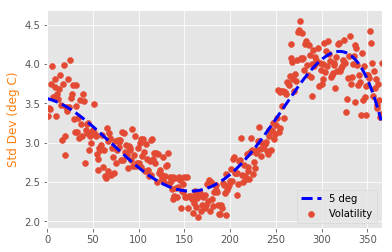

In [19]:
vol = df.groupby(['day'])['Tmax'].agg(['mean','std'])
plt.scatter(vol.index,vol['std'], label='Volatility')
plt.plot(poly5, '--', linewidth=3, label='5 deg',color='blue')
plt.ylabel('Std Dev (deg C)',color='tab:orange')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

In [20]:
from scipy import interpolate
x=np.array(vol['std'].index)
y=np.array(vol['std'].values)#back from flatten to one dimension 

In [21]:
knot_numbers=5
x_new=np.linspace(0,1,knot_numbers+2)[1:-1]#taking a random value from range 0 to 7 first and last values are ommitted
x_knots=np.quantile(x,x_new)#taking those random selected percentile values from x distribution
x_new,x_knots

(array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333]),
 array([ 61.83333333, 122.66666667, 183.5       , 244.33333333,
        305.16666667]))

In [22]:
knot_numbers,coef,degrees_of_freedom=interpolate.splrep(x, y, t=np.quantile(x, x_new))#finding out the best fitted parametes
knot_numbers,coef,degrees_of_freedom

(array([  1.        ,   1.        ,   1.        ,   1.        ,
         61.83333333, 122.66666667, 183.5       , 244.33333333,
        305.16666667, 366.        , 366.        , 366.        ,
        366.        ]),
 array([3.61647863, 3.60226166, 2.73010226, 2.89494381, 1.84623251,
        3.31701756, 4.53958781, 3.63741713, 3.71301141, 0.        ,
        0.        , 0.        , 0.        ]),
 3)

In [23]:
yfit = interpolate.BSpline(knot_numbers,coef,degrees_of_freedom)(x)
yfit

array([3.61647863, 3.61543849, 3.61373217, 3.61137745, 3.60839212,
       3.60479396, 3.60060077, 3.59583031, 3.5905004 , 3.5846288 ,
       3.57823331, 3.57133172, 3.56394181, 3.55608136, 3.54776817,
       3.53902002, 3.5298547 , 3.52028999, 3.51034369, 3.50003357,
       3.48937743, 3.47839306, 3.46709823, 3.45551073, 3.44364836,
       3.4315289 , 3.41917013, 3.40658985, 3.39380583, 3.38083588,
       3.36769776, 3.35440928, 3.34098821, 3.32745234, 3.31381947,
       3.30010737, 3.28633383, 3.27251665, 3.2586736 , 3.24482248,
       3.23098107, 3.21716715, 3.20339852, 3.18969296, 3.17606826,
       3.1625422 , 3.14913257, 3.13585717, 3.12273376, 3.10978015,
       3.09701412, 3.08445345, 3.07211593, 3.06001936, 3.0481815 ,
       3.03662016, 3.02535312, 3.01439817, 3.00377309, 2.99349566,
       2.98358369, 2.97405492, 2.96491935, 2.95616792, 2.94778868,
       2.93976971, 2.93209907, 2.92476482, 2.91775504, 2.91105779,
       2.90466113, 2.89855313, 2.89272186, 2.88715538, 2.88184

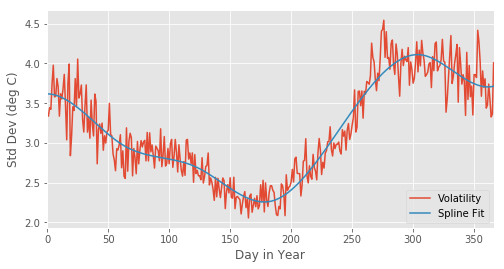

In [24]:
plt.figure(figsize=(8,4))
plt.plot(x, y, label='Volatility')
plt.plot(x, yfit, label='Spline Fit')
plt.ylabel('Std Dev (deg C)')
plt.xlabel('Day in Year')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()

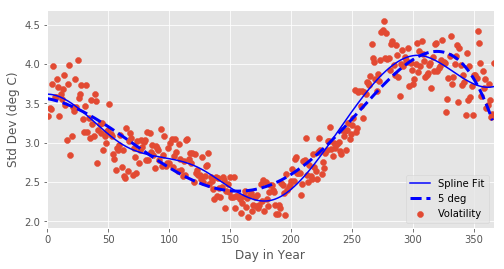

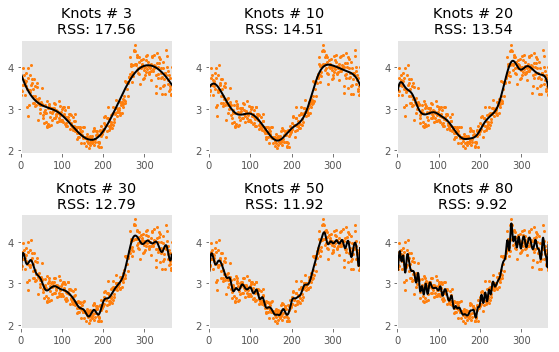

In [25]:
x = np.array(vol['std'].index)
y = np.array(vol['std'].values)
knot_numbers = 5
x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
q_knots = np.quantile(x, x_new) 
t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
yfit = interpolate.BSpline(t,c,k)(x) 
plt.figure(figsize=(8,4))
plt.scatter(x, y, label='Volatility')
plt.plot(x, yfit, label='Spline Fit',color='Blue')
plt.plot(poly5, '--', linewidth=3, label='5 deg',color='blue')
plt.ylabel('Std Dev (deg C)')
plt.xlabel('Day in Year')
plt.xlim(0,366) 
plt.legend(loc='lower right')
plt.show()
def spline(knots, x, y):
    x_new = np.linspace(0, 1, knots+2)[1:-1]
    t, c, k = interpolate.splrep(x, y, t=np.quantile(x, x_new))
    yfit = interpolate.BSpline(t,c, k)(x)
    return yfit
knots = [3, 10, 20, 30, 50, 80]
i = 0
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))
for row in range(2):
    for col in range(3):
        ax[row][col].plot(x, y, '.',c='tab:orange', markersize=4)
        yfit = spline(knots[i], x, y)
        rss = np.sum( np.square(y-yfit) )
        ax[row][col].plot(x, yfit, 'k', linewidth=2)
        ax[row][col].set_title("Knots # "+str(knots[i])+"\nRSS: "+str(round(rss,2)), color='k')
        ax[row][col].set_xlim(0,366)
        ax[row][col].grid()
        i=i+1
        
plt.tight_layout()        
plt.show() 

Trend or long term volatility is easy: ~ 2.918


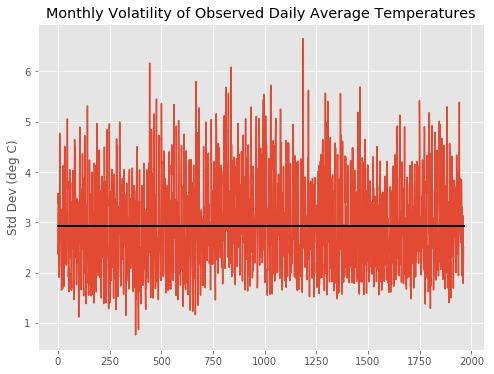

,year,month,mean,std
0,1859,1,25.700000,3.392737
1,1859,2,25.385714,3.571566
2,1859,3,24.180645,2.356610
3,1859,4,23.136667,2.768229
4,1859,5,19.458065,3.182847
...,...,...,...,...
1958,2022,3,24.790323,2.000392
1959,2022,4,23.733333,3.131413
1960,2022,5,20.790323,2.841520
1961,2022,6,18.300000,1.783656


In [26]:
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
vol = df.groupby(['year','month'])['Tmax'].agg(['mean','std'])
vol = vol.reset_index()
vol['std'].plot(figsize=(8,6))
plt.plot([0, len(vol)], [vol['std'].mean(),vol['std'].mean()],'k',linewidth=2)
plt.ylabel('Std Dev (deg C)')
plt.title('Monthly Volatility of Observed Daily Average Temperatures', color='k',)
print('Trend or long term volatility is easy: ~', round(vol['std'].mean(),3))
plt.show()
vol

In [27]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order, AutoRegResults
print('Gamma is: ', round(vol['std'].std(),3))
model = AutoReg(vol['std'],lags=1,trend='n')
model_fit  = model.fit()
coef = model_fit.params
res = model_fit.resid
print('Rate of mean reversion of volatility process is : ', coef[0])
print(model_fit.summary())

Gamma is:  0.916
Rate of mean reversion of volatility process is :  0.9487615427270186
                            AutoReg Model Results                             
Dep. Variable:                    std   No. Observations:                 1963
Model:                     AutoReg(1)   Log Likelihood               -2713.916
Method:               Conditional MLE   S.D. of innovations              0.965
Date:                Sat, 27 Aug 2022   AIC                           5431.831
Time:                        23:46:26   BIC                           5442.994
Sample:                             1   HQIC                          5435.934
                                 1963                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
std.L1         0.9488      0.007    133.185      0.000       0.935       0.963
                                    Roots   

In [28]:
#Stochastic Differential Equation Completed!
#dTt=[dTt¯dt+0.438(Tt¯–Tt)]dt+σtdW1,t
#dσt=0.954(2.15–σt)dt+0.580dW2,t

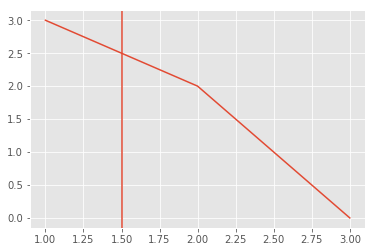

In [29]:
x=[1,2,3]
y=[3,2,0]
x_new=1.5
plt.plot(x,y)
plt.axvline(x_new)

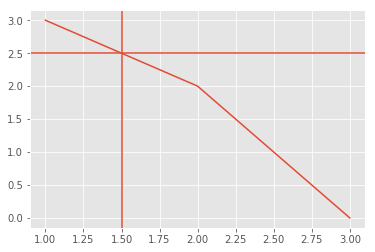

In [30]:
y_new=np.interp(x_new,x,y)
plt.plot(x,y)
plt.axvline(x_new)
plt.axhline(y_new)

In [31]:
y_new=np.interp(x_new,x,y)


In [32]:
from scipy import interpolate
x=np.array(vol['std'].index)
y=np.array(vol['std'].values)#back from flatten to one dimension 

In [33]:
f=interpolate.interp1d(x,y,kind='cubic')

In [34]:
x_new=np.arange(1,366,20)
x_new

array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221, 241,
       261, 281, 301, 321, 341, 361])

In [35]:
y_new=f(x_new)

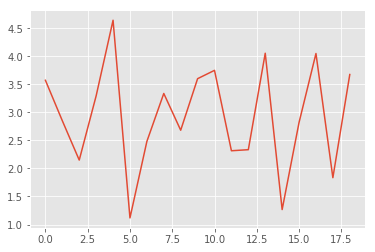

In [36]:
plt.plot(y_new)